In [12]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import community

G = pickle.load(open('graphs/user_user_graph.pickle', 'rb'))
G = G.subgraph(max(nx.connected_components(G), key=len))

df1 = pd.read_feather('data/text_df_1.feather')
df2 = pd.read_feather('data/text_df_2.feather')
df3 = pd.read_feather('data/text_df_3.feather')

frames = [df1, df2, df3]
data = pd.concat(frames)

In [13]:
data.head()

,ProductId,UserId,Text,Clean_text
0,B001E4KFG0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...
1,B00813GRG4,A1D87F6ZCVE5NK,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salted peanuts pean...
2,B000LQOCH0,ABXLMWJIXXAIN,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,B000UA0QIQ,A395BORC6FGVXV,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [14]:
degrees = [d for _, d in G.degree]

v = [i - 0.5 for i in range(np.min(degrees), np.max(degrees) + 2)]
h = np.histogram(degrees, v)[0]

x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

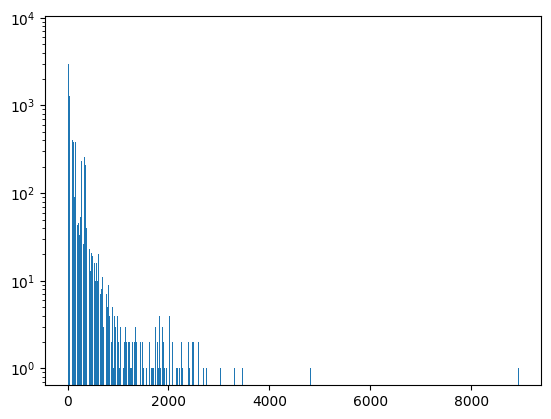

In [15]:
plt.bar(x, h)
plt.yscale('log')
plt.show()

In [16]:
[p for p, d in G.degree if d > 4000]

['A2SZLNSI5KOQJT',
 'A17HMM1M7T9PJ1',
 'AQLL2R1PPR46X',
 'A2MUGFV2TDQ47K',
 'A281NPSIMI1C2R',
 'A3PJZ8TU8FDQ1K',
 'A100WO06OQR8BQ',
 'A2Y8IDC1FKGNJC',
 'AY1EF0GOH80EK',
 'A3094EPI56GKZ6',
 'A2XNOB1T796Y6B',
 'A25C2M3QF9G7OQ',
 'AWKZAUC0D8DYL',
 'A3OXHLG6DIBRW8',
 'A1WX42M589VAMQ',
 'A1Z54EM24Y40LL',
 'A2FRFAQCWZJT3Q',
 'A1YJMG0QJXZLD4',
 'A2YKWYC3WQJX5J',
 'AY12DBB0U420B',
 'A1ZPY91VE3IDN1',
 'A22PUBSSNP54L',
 'AKMEY1BSHSDG7',
 'A10PEXB6XAQ5XF',
 'A3CG6YLYZJXQG4',
 'A3HPCRD9RX351S',
 'AKJHHD5VEH7VG',
 'A35JP8KSV9281K',
 'ARYSDAZNRXN6G',
 'AYNAH993VDECT',
 'A353U0L2HAMSHV',
 'A2MSQNPTNAAGL1']

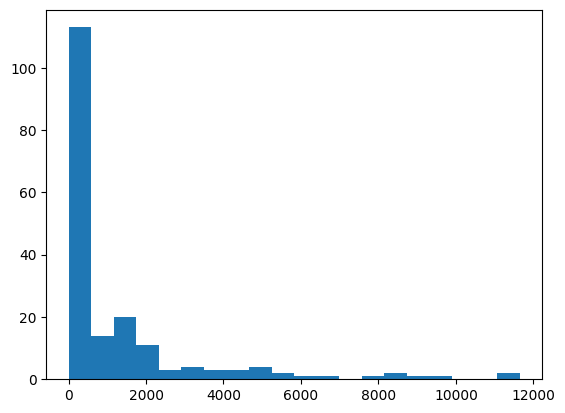

In [17]:
G_undirected = nx.to_undirected(G)
partition = nx.community.louvain_communities(G_undirected, seed=123)
partition_len = [len(p) for p in partition]

plt.hist(partition_len, 20)
plt.show()

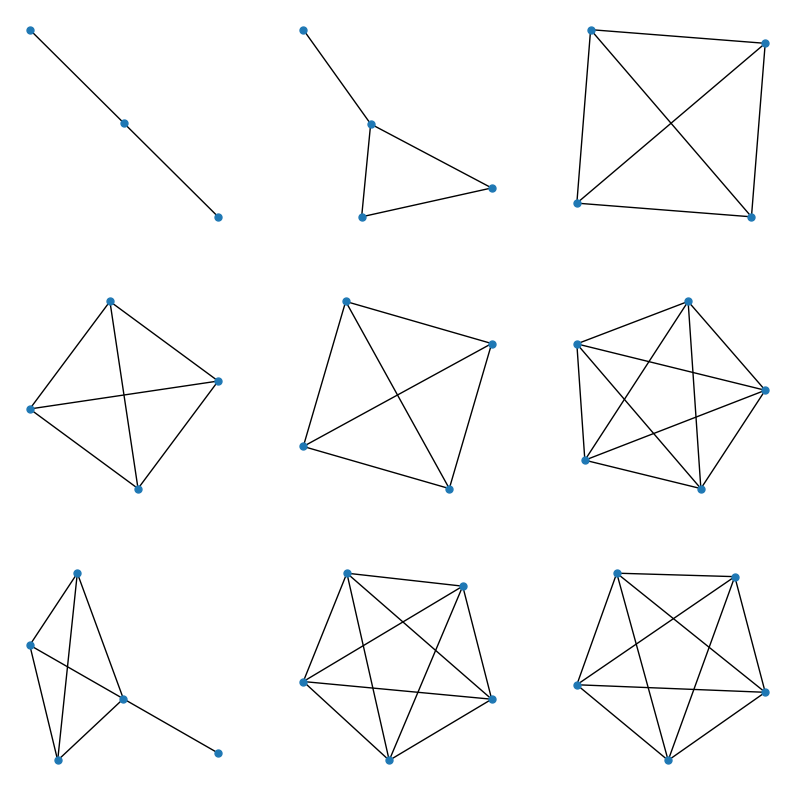

In [18]:
partition = sorted(partition, key=len)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    nx.draw(G.subgraph(partition[i]), node_size=25)